In [1]:
import random
import matplotlib.pyplot as plt
import randomWalk_v01 as rw_01

In [68]:
# parameters
## global
seed = 123
numberOfRuns = 3
movements = 20
worldDimensions = {"x":(-50,50), "y":(-50,50)}

## initial conditions
initPositionX = 0.0
initPositionY = 0.0
initDirection = 0.0

## movement parameters
angleLeftMax = 30.0
angleRightMax = 30.0
moveDistanceMin = 1.0
moveDistanceMax = 10.0

In [69]:
# position series holders (multiple runs)
x = []
y = []
for i in range(0,numberOfRuns):
    x.append([initPositionX])
    y.append([initPositionY])

In [70]:
# set random seed
random.seed = seed

In [71]:
# initialise walker agent
randomWalker = rw_01.Walker(initPositionX, initPositionY, initDirection)

In [72]:
# move walker 'movements' times
for i in range(0,numberOfRuns):
    # move walker
    for j in range(0,movements):
        randomWalker.MoveRandom(angleLeftMax, angleRightMax, 
                                moveDistanceMin, moveDistanceMax, 
                                worldDimensions)
        x[i].append(randomWalker.positionX)
        y[i].append(randomWalker.positionY)
    # reset walker
    randomWalker.positionX = initPositionX
    randomWalker.positionY = initPositionY
    randomWalker.direction = initDirection


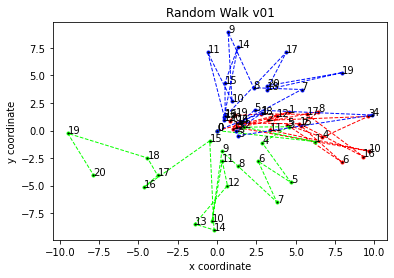

In [73]:
colors = plt.get_cmap('hsv', 512)

# plotting the trajectories for each run  
for i in range(0,numberOfRuns):
    # plot points
    plt.plot(x[i], y[i], 
             color = colors(i/numberOfRuns), 
             linestyle = 'dashed', 
             linewidth = 1, 
             marker = 'o', 
             markerfacecolor = 'black', 
             markersize = 3)
    for j in range(0,len(x[i])):
        plt.annotate(str(j), (x[i][j], y[i][j]))

# naming the x axis 
plt.xlabel('x coordinate') 
# naming the y axis 
plt.ylabel('y coordinate') 
  
# giving a title to my graph 
plt.title('Random Walk v01') 
  
# function to show the plot 
plt.show() 

In [4]:
# test IsOutsideWorld
rw_01.Walker.Test_IsOutsideWorld(initPositionX, initPositionY, worldDimensions)

"IsOutsideWorld(0.0, 0.0, {'x': (-50, 50), 'y': (-50, 50)}) returns False"

In [4]:
# test GetRandomRotation
print(rw_01.Walker.Test_GetRandomRotation(initDirection))
print(rw_01.Walker.Test_GetRandomRotation(initDirection))
print(rw_01.Walker.Test_GetRandomRotation(initDirection))

GetRandomRotation(currentDirection = 0.0, angleLeftMax = 180, angleRightMax = 180) returns newDirection = 337.171683140613
GetRandomRotation(currentDirection = 0.0, angleLeftMax = 180, angleRightMax = 180) returns newDirection = 36.49868540402858
GetRandomRotation(currentDirection = 0.0, angleLeftMax = 180, angleRightMax = 180) returns newDirection = 283.9795327805283


In [5]:
# test MoveRandomFree
rw_01.Walker.Test_MoveRandomFree(initPositionX, initPositionY, initDirection, 
                                 angleLeftMax, angleRightMax, moveDistanceMin, moveDistanceMax)

'Walker(x = 0.0, y = 0.0, currentDirection = 0.0) -> MoveRandomFree(angleLeftMax = 180, angleRightMax = 180, moveDistanceMin = 1.0, moveDistanceMax = 1.0) returns (x,y,newDirection) = (-0.051695957234216376, 0.9986628700445601, 92.96328104913482)'

In [6]:
# test MoveRandom
rw_01.Walker.Test_MoveRandom(initPositionX, initPositionY, initDirection, 
                             angleLeftMax, angleRightMax, moveDistanceMin, moveDistanceMax,
                             worldDimensions)

"Walker(x = 0.0, y = 0.0, currentDirection = 0.0) -> MoveRandom(angleLeftMax = 180, angleRightMax = 180, moveDistanceMin = 1.0, moveDistanceMax = 1.0, worldDimensions = {'x': (-50, 50), 'y': (-50, 50)}) returns (x,y,newDirection) = (-0.9675981429353708, 0.2524952153764932, 165.37478455658675)"

In [55]:
x[0][1]

3.486765510870436